In [13]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [14]:
# Parameters
M = 10 # number of simulations
t = 10 # Time

In [15]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)
rw_paths

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.],
       [ 2.,  2., -2.,  0.,  0.,  2., -2.,  0., -2., -2.],
       [ 3.,  1., -3., -1., -1.,  1., -3., -1., -3., -1.],
       [ 4.,  0., -4.,  0., -2.,  0., -2., -2., -4.,  0.],
       [ 5., -1., -5., -1., -3., -1., -1., -3., -3.,  1.],
       [ 4., -2., -4., -2., -2.,  0.,  0., -4., -2.,  2.],
       [ 3., -3., -5., -1., -3.,  1.,  1., -5., -1.,  1.],
       [ 4., -4., -4.,  0., -4.,  2.,  0., -6., -2.,  0.],
       [ 5., -5., -5., -1., -5.,  3., -1., -5., -1.,  1.],
       [ 6., -6., -6., -2., -4.,  4.,  0., -4., -2.,  2.]])

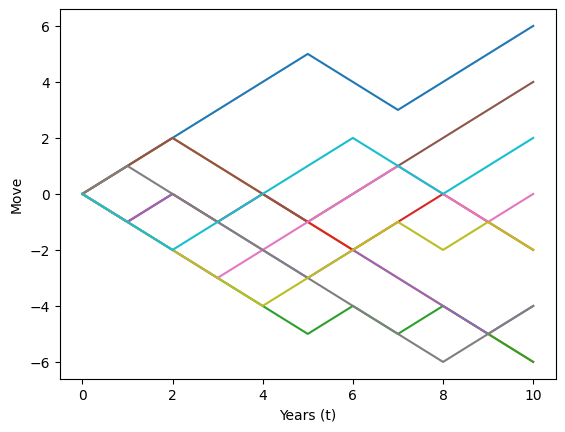

In [16]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [17]:
# The quadratic variation measures the accumulated squared differences between consecutive points, 
# while the variance quantifies how much the values in each path vary from their mean. By observing how 
# variance changes with the number of simulations, you can get insights into the 
# convergence behavior of variance over time.

In [18]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)
x = [quadratic_variation(path) for path in rw_paths.T[:4]]
print(x)

# Change the number of simulation to 10,000,000 to observe variance convergence on Time
y = [variance(path) for path in rw_paths[1:11]]
y

[10.0, 10.0, 10.0, 10.0]


[0.96, 2.76, 3.56, 5.0, 6.76, 5.8, 6.76, 8.84, 11.84, 15.36]

# Scaled Symmmetric Random Walk

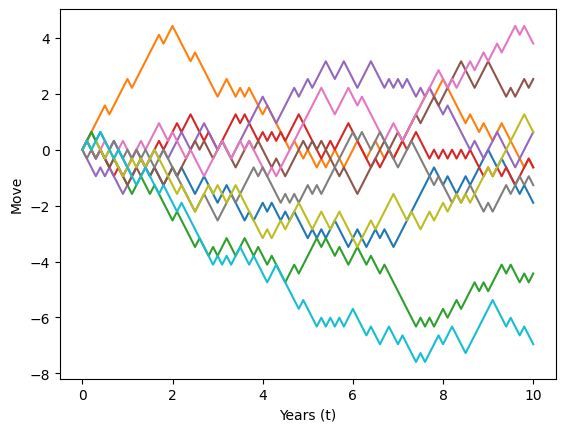

[10.0, 10.0, 10.0, 10.0]

In [19]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)          # returns evenly spaced numbers over a specified interval
tt = np.full(shape=(M, t*n+1), fill_value=time) # Return a new array of given shape and type, filled with fill_value
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]

[quadratic_variation(path) for path in srw_paths.T[:4]]

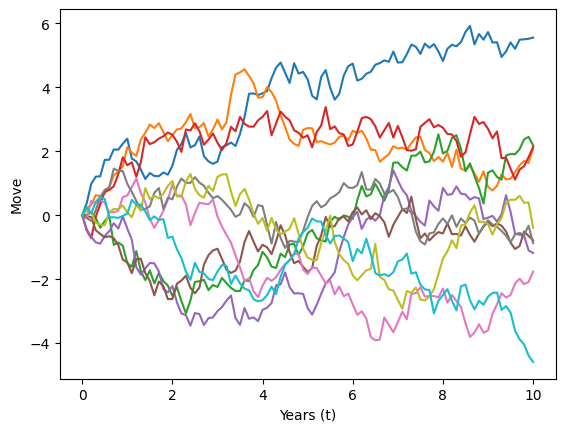

[0.07, 0.229, 0.307, 0.394, 0.518, 0.484, 0.863, 0.976, 1.284, 1.667]

In [20]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step

steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]